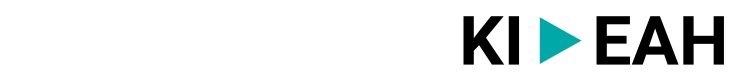

**Baustein:** Clustering

**Subbaustein:** Grundlagen, Übersicht, Partitionierendes und Hierarchisches Clustering

**Version:** 1.0, **Lizenz:** <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">CC BY-NC-ND 4.0</a>

***

# Part 2/4 - Übung: Anwendung K-Means und Agglomeratives Hierarchisches Clustering

Folgende Problemstellung soll mit Hilfe des Clustering Algorithmuses K-Means diskutiert und gelöst werden: 

Gegeben sei der Datensatz **CLU-D00.csv**, in dem jeder Datenpunkt aus einem Floatwert für die *Intensität der Kopfschmerzen* (angegeben als *headache*), einem Floatwert für *Intensität der Gliederschmerzen* (angegeben als *melalgia*) und einem Integer (angegeben als *class*), der angibt zu welchem Cluster der Datenpunkt gehört, besteht. Bei einem realen Clusteringproblem ist letzteres nicht gegeben. Aber um die Effizienz des Algorithmus zu evaluieren nutzen wir diesen Werte als Vergleichswert (Ground Truth).


## Importieren aller notewendigen Bibliotheken
---

In [1]:
%load_ext autoreload
%autoreload 2

# Eine Bibliothek zur effizienten Anwendung mathematischer Operationen auf Array
import numpy as np
# Pandas ist ein schnelles, leistungsstarkes, flexibles und benutzerfreundliches Open-Source-Tool zur Datenanalyse und -manipulation.
import pandas as pd
# Zur Erstellung statischer, animierter und interaktiver Visualisierungen
import matplotlib.pyplot as plt
# Datenvisualisierung basierend auf matplotlib
import seaborn as sns
# Bibliothek für die Datenanalyse
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import rand_score
# Stellt Algorithmen für die das wissenschaftliche Rechnen bereit
from scipy.cluster.hierarchy import dendrogram
# selbst definierte .py files (siehe Ordner "utils")
from utils.UtilsCLU import WidgetsKMeans, get_linkage_matrix

import warnings
warnings.filterwarnings('ignore')

## <font color='green'>Übung 1: Datenzugriff</font>
---
Ein wichtiger Bestandteil des Maschinellen Lernens ist die Verwaltung von Daten, d.h. die Aufnahme, das Speichern und das Lesen der Daten. In dieser ¨Ubung beschr¨anken wir uns auf das Letztere. Die vorliegende Datei liegt im CSV-Format vor und soll im Folgenden gelesen und interpretiert werden.

### Info: Angaben zum Datensatz:
Jede Zeile in der CSV-Datei gibt einen Datenpunkt wieder, mit Ausnahme der ersten Zeile. Diese beschreibt die einzelnen Werte eines jeden Datenpunktes. Die ersten 4 Zeilen des Datensatzes *CLU-D00.csv* sehen wie folgt aus:<br />

headache,melalgia,class<br />
4.3, 49.1, 0<br />
20.8, 50.7, 0<br />
7.0, 47.5, 0<br />

Formatiert sieht der Auszug folgendermaßen aus:

| headache | melalgia | class |
|---|---|---|
| 4.3 | 49.1 | 0 |
| 20.8 | 50.7 | 0 |
| 7.0 | 47.5 | 0 |

Daraus lässt sich nun ableiten, dass dieser Datensatz drei Features besitzt (headache, melalgia, class). Jedes Feature wird durch eine Spalte im Datensatz ausgedrückt. Jeder Datenpunkt hingegen wird durch eine Reihe ausgedrückt und besteht aus drei Instanzen der oben genannten Features, die durch Kommata separiert werden, d.h. das Komma dient als **Delimiter**. Somit besteht der erste Datenpunkt aus dem 3-Tupel (4.3, 49.1, 0).

Folgende Einschränkungen gelten pro Datenpunkt $x$:
$$
x\in [0,100]\times[0,100]\times\{0,1,2\}
$$

### <font color='brown'>Aufgabe 1.1</font>
---
Lesen Sie die CSV-Datei und geben Sie die folgenden Informationen über den Inhalt wieder. Einige der Informationen wurden bereits erwähnt. Nutzen Sie entprechenden Pythoncode oder Orangewidgets um die Angaben zu überprüfen.
- Anzahl der Features
- Anzahl der Datenpunkte
- Wertebereich pro Feature
- Mittelwert und Standardabweichung pro Feature

### <font color='brown'>Lösung 1.1</font>
---

In [23]:
# TODO

## <font color='green'>Übung 2: Visualisierung</font>
---
Um die Daten besser interpretieren zu können, sollten diese bei entsprechenden Dimensionen direkt visualisiert werden. Dies ermöglicht es, eventuelle Muster visuell zu identifizieren. Die nachfolgenden Aufgaben konzentrieren sich auf die verschiedenen Möglichkeiten der Datenvisualisierung.

### <font color='brown'>Aufgabe 2.1</font>
---
Visualisieren Sie für jedes Feature die Verteilung.

### <font color='brown'>Lösung 2.1</font>
---

In [24]:
# TODO

### <font color='brown'>Aufgabe 2.2</font>
---
Visualisieren Sie den gesamten Datensatz als Scatterplot. Wie viele Cluster k¨onnen visuell identifiziert werden?

### <font color='brown'>Lösung 2.2</font>
---

In [25]:
# TODO

## <font color='green'>Übung 3: K-Means</font>
---
K-Means als Vertreter des partitionierenden Clusterings zeigt sich als robuste Methode Datensätze, mit sphärischen Verteilungen, zu gruppieren. In den folgenden Aufgaben soll der K-Means auf den Datensatz **CLU-D01** angewandt werden.

### <font color='brown'>Aufgabe 3.1</font>
---
Ein Hyperparameter des K-Means ist die Anzahl der Cluster. Diese werden vom Algorithmus nicht bestimmt, sondern müssen vom Nutzer angegeben werden. Dies kann man machen, indem man sich den Datensatz plottet und schaut, ob sich die Datensätze visuell trennen lassen. In unserem Beispiel ist dies möglich und es ergibt sich $K=3$. Problematisch wird es erst, wenn die Anzahl der Features größer als drei ist, denn dann lassen sich die Datenpunkte nicht mehr visualisieren. Eine weitere Möglichkeit ist die Bestimmung von $K$ aufgrund von Expertenwissen. Liegt aber beides nicht vor, muss die Anzahl anders bestimmt werden. Hierfür gibt es die folgenden zwei Verfahren:
- **Ellbogen-Methode**: <br />Hierbei wir die Summe der quadratische Abweichungen (Sum of Squared Distances - SSD) für verschiedene Anzahlen von Clustern berechnet und graphisch dargestellt. Der Punkt auf der Graphik, an dem der SSD-Abfall abflacht und eine Art Ellbogen bildet, wird als optimaler Punkt für die Anzahl der Cluster betrachtet.
- **Silhouetten-Methode**: <br />Sie berechnet für jeden Datenpunkt eine Silhouettenkoeffizienten, der die Ähnlichkeit innerhalb des eigenen Clusters im Vergleich zu den benachbarten Clustern misst. Ein hoher Silhouettenkoeffizient (nahe 1) zeigt an, dass der Datenpunkt gut seinem eigenen Cluster zugeordnet ist und sich gut von den anderen Clustern unterscheidet. Ein niedriger Silhouettenkoeffizient (nahe -1) deutet auf eine schlechte Clusterbildung hin. Die durchschnittliche Silhouettenkoeffizienten aller Datenpunkte wird verwendet, um die Qualität des Clustering-Ergebnisses zu bewerten, wobei ein höherer Durchschnittswert auf eine bessere Clusterbildung hinweist.

### <font color='brown'>Lösung 3.1</font>
---

In [26]:
# TODO

### <font color='brown'>Aufgabe 3.2</font>
---
In diesem Schritt wird der K-Means Algorithmus auf den Datensatz mit $K=3$ angewandt. Den K-Means gibt es in mehreren Varianten.
Der bekannteste ist **Lloyd's Algorithmus**, der im folgenden Anwendung findet. Der Algorithmus kann wie folgt beschrieben werden:

1. Wahle die Anzahl der Cluster $K$.
2. Wähle zufällig $K$ Clusterzentren aus dem gegebenen Datensatz.
3. Berechne die Abstände zwischen den Datenpunkten und den Clusterzentren.
4. Ordne jeden Datepunkt dem nähersten Cluster zu.
5. Berechne neue Clusterzentren als Mittelwert der zugeordneten Datenpunkte
6. Wiederhole Schritte 3-5 bis die Clusterzentren ihre Position nicht verändern.

Wenden Sie den K-Means mit der oben ermittelten Anzahl an Clustern an. Visualisieren Sie sowohl
das Ergebnis der rohen (nicht-normalisierten) und der normalisierten Daten. Erklären Sie wie die Verteilung der nicht-normalisierten Daten zu interpretieren ist bzgl. der Trennung der Cluster.

Im Datensatz **CLU-D00** bewegen sich beide Features in der selben Range:
$$
x\in [0,100]\times[0,100]
$$
Jedoch kann es nach Beschaffenheit der Daten dazu kommen, dass die Features stark voneinander abweichende Definitionsbereiche haben. Der Datensatz **CLU-D01** hat folgende Range:
$$
x\in [0,1000]\times[0,1]
$$
Dieser Unterschied kann beim Clustering zu fehlerhaften Ergebnissen führen. Deshalb müssen die Daten vorher normalisiert werden.

### <font color='brown'>Lösung 3.2</font>
---

In [27]:
# TODO

### <font color='brown'>Aufgabe 3.3</font>
---
Um sich den Verlauf des K-Means besser vorstellen zu können, visualisieren Sie sich die Iterationen des Algorithmus über das interaktive K-Means-Element.

### <font color='brown'>Lösung 3.3</font>
---

In [28]:
# TODO


## <font color='green'>Übung 4: Evaluation</font>
---
Um die Güte der Clusteringergebnisse zu bewerten, gibt es prinzipiell zwei große Kategorien von Methoden:
</br></br>
**Externe Gütemaße**:</br>
In diesem Fall liegt ein Vergleichsclustering, d.h. Groundtruth, vor, das für die Bewertung genutzt werden kann. Ein Beispiel für solch ein Gütemaß ist der Rand-Index (RI). Zur Erinnerung: Der RI kann Werte zwischen 0 und 1 annehmen, wobei ein Wert von 1 eine perfekte Übereinstimmung zwischen dem Clustering-Ergebnis und der wahren Klassenzuordnung anzeigt, ein Wert nahe 0 auf eine zufällige Klassenzuordnung hinweist. Der Rand-Index wird durch den Vergleich von Paaren von Datenpunkten zwischen zwei Clustering-Ergebnissen berechnet. Folgende Formel wird hierfür verwendet:
$$RI=\dfrac{a+b}{a+b+c+d}=\dfrac{a+b}{\binom{n}{2}}$$
Die Parameter in der obigen Gleichung sind wie folgt definiert:</br>
- $a$, die Anzahl an Paaren von Elementen in $S$, die in der **selben** Partition in $X$ und in der **selben** Partition in $Y$ sind.
- $b$, die Anzahl an Paaren von Elementen in $S$, die in **unterschiedlichen** Partition in $X$ und in **unterschiedlichen** Partition in $Y$ sind.
- $c$, die Anzahl an Paaren von Elementen in $S$, die in der **selben** Partition in $X$ und in **unterschiedlichen** Partition in $Y$ sind.
- $d$, die Anzahl an Paaren von Elementen in $S$, die in **unterschiedlichen** Partition in $X$ und in der **selben** Partition in $Y$ sind.

**Interne Gütemaße**:</br>
Liegt kein Clustering vor, das als Vergleich herangezogen werden kann, muss die Güte des Clusteringergebnisses anhand interner Eigenschaften bestimmt werden. Das hier betrachtete Gütemaß wurde bereits in Übung 3 behandelt, und zwar der Silhouettenkoeffzient. Er misst, wie gut die Datenpunkte innerhalb eines Clusters zusammenpassen und wie gut sie von den Datenpunkten in anderen Clustern unterschieden werden können. Ein höherer Silhouettenkoeffizient deutet auf eine bessere Trennung und Konsistenz der Cluster hin. Der Silhouettenkoeffizient wird für jeden Datenpunkt einzeln berechnet und kann Werte zwischen -1 und 1 annehmen. Ein Wert von 1 zeigt an, dass der Datenpunkt gut zu seinem eigenen Cluster passt und gut von den Datenpunkten in anderen Clustern unterschieden werden kann. Ein Wert nahe 0 zeigt an, dass der Datenpunkt nahe an der Trennlinie zwischen zwei Clustern liegt. Ein Wert nahe -1 deutet darauf hin, dass der Datenpunkt möglicherweise im falschen Cluster platziert wurde. Der Koeffizient wird für jeden Datenpunkt einzeln berechnet:
$$s(i)=\dfrac{b(i) - a(i)}{\max(a(i), b(i))},~\textrm{if}~|C_I|>1$$
$$s(i)=0,~\textrm{if}~|C_I|=1$$
und dann aufsummiert:
$$S=\dfrac{1}{|D|}\sum_{i\in D}s(i)$$
Die Parameter sind wie folgt definiert:
$$a(i)=\dfrac{1}{|C_I|-1}\sum_{j\in C_I,i\neq j}d(i,j)$$
$$b(i)=\min_{J\neq I}\dfrac{1}{|C_J|}\sum_{j\in C_J}d(i,j)$$

Die ermittelten Clusterergebnisse müssen nun mit Hilfe des internen Gütemaßes (Silhouettenkoeffizient) auf Qualität geprüft werden.

### <font color='brown'>Aufgabe 4.1</font>
---
Berechnen Sie den Silhouettenkoeffizienten. Interpretieren Sie die Ergebnisse.

### <font color='brown'>Lösung 4.1</font>
---

In [29]:
# TODO

## <font color='green'>Übung 5: AHC</font>
---
Bisher wurden nur Datensätze mit spährischen Clustern betrachtet. Datensätze mit dieser Natur lassen sich sehr gut mit dem K-Means clustern. Datensätze mit Clustern, die Ringförmige strukturen aufweisen, sind über den K-Means nicht gruppierbar. Hierfür muss ein anderes Verfahren hinzugezogen werden. Ein bereits bekanntes Verfahren ist das Agglomerative Hierarchische Clustering. Ausgehend davon, dass jeder Datenpunkt ein eigenes Cluster dargstellt, werden bei dieser Methode iterativ die nährsten beiden Cluster zusammengefasst bis nur noch ein Cluster übrig bleibt. Visualisieren lässt sich das durch das Dendogram.

### <font color='brown'>Aufgabe 5.1</font>
---
Lesen Sie den Datensatz **CLU-D02.csv** und wenden Sie dann das Hierarchische Clustering mit der Single-Linkage-Methode an. Entscheiden Sie anhand des Dendogramms, welche Anzahl an Clustern optimal ist. Begründen Sie Ihre Entscheidung.

### <font color='brown'>Lösung 5.1</font>
---

In [30]:
# TODO

### <font color='brown'>Aufgabe 5.2</font>
---
Plotten Sie nun das Ergebnis des Hierarchischen Clusterings mit der zuvor ermittelten optimalen Anzahl an Clustern. Visualieren Sie zusätzlich das Ergebnis des K-Means Algorithmus um zu zeigen, dass dieser hier fehlschlägt

### <font color='brown'>Lösung 5.2</font>
---

In [31]:
# TODO